
<p align ="left"><font size="5">Program to Implement Contrast Stretching.</font></p>


In [ ]:
import cv2
from google.colab import drive
drive.mount("/content/gdrive")
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

Mounted at /content/gdrive


In [ ]:
img1 = cv2.imread("/content/gdrive/MyDrive/Colab Notebooks/CV_IMAGES/LAB2.jpeg", cv2.IMREAD_COLOR)
#cv2_imshow(img1)
print("Image Height: ", img1.shape[0])
print("Image Width: ", img1.shape[1])
print("Number of Channels (Colors): ", img1.shape[2])

Image Height:  763
Image Width:  969
Number of Channels (Colors):  3


In [ ]:
def rgb_plots(image):
  blue_hist = cv2.calcHist([image], [0], None, [256], [0, 255])
  green_hist = cv2.calcHist([image], [1], None, [256], [0, 255])
  red_hist = cv2.calcHist([image], [2], None, [256], [0, 255])

  plt.figure(figsize = (12.7,8.7))
  # plt.subplot(2,3,1)

  # plt.hist(image.ravel(),256,[0,256])

  plt.subplot(2,2,1)
  color = ('b','g','r')
  for i,col in enumerate(color):
      histr = cv2.calcHist([image],[i],None,[256],[0,256])
      plt.plot(histr,color = col)

      plt.title("RGB")
      plt.xlim([0,256])

  plt.subplot(2,2,2)
  plt.plot(red_hist, color='r', label ="red")
  plt.xlim([0, 255])
  plt.title('Histogram -Red Channel')

  plt.subplot(2,2,3)
  plt.plot(green_hist, color='g')
  plt.xlim([0, 255])
  plt.title('Histogram -Green Channel')

  plt.subplot(2,2,4)
  plt.plot(blue_hist, color='b')
  plt.xlim([0, 255])
  plt.title('Histogram - Blue Channel')

  plt.tight_layout()
  plt.show()


def gray_plots(gray_image):
  plt.hist(gray_image.ravel(),256,[0,256])
  plt.title("Histogram of Gray-scale Image")
  plt.show()

def gamma_transform():
  image_gamma = np.array(255*(image/ 255) ** 3, dtype = 'uint8')
  bordered_image = cv2.copyMakeBorder(src=image, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)
  bordered_image_gamma =cv2.copyMakeBorder(src=image_gamma, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)
  gamma_images = cv2.hconcat([bordered_image, bordered_image_gamma])
  print("Original Image\t\t\t\t\t\t\t\t\t Gamma Transformed Image. Gamma = 2.2")
  print()
  cv2_imshow(gamma_images)
  rgb_plots(gamma_images)
  gray_gamma_images = np.array(255*(gray_image/ 255) ** 2.2, dtype = 'uint8')
  image_bordered1 = cv2.copyMakeBorder(src=gray_gamma_images, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)
  image_bordered2 = cv2.copyMakeBorder(src=gray_image, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)
  gray_images =cv2.hconcat([image_bordered1, image_bordered2])
  print("Gray-Scale Image\t\t\t\t\t\t\t Gamma Transformed Gray Image. Gamma = 2.2")
  print()

  cv2_imshow(gray_images)
  gray_plots(gray_gamma_images)

def linear_Transform(pix, r1, s1, r2, s2):
	if (0 <= pix and pix <= r1):
		return (s1 / r1)*pix
	elif (r1 < pix and pix <= r2):
		return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
	else:
		return ((255 - s2)/(255 - r2)) * (pix - r2) + s2

def normalizedimage():
  resultimage = np.zeros((800,800))
  rgbnormalizedimage = cv2.normalize(image, resultimage, 0, 300, cv2.NORM_MINMAX)
  border_rgbnormalizedimage =cv2.copyMakeBorder(src=rgbnormalizedimage, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)
  border_image =cv2.copyMakeBorder(src=image, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)
  rgb_normal = cv2.hconcat([border_image, border_rgbnormalizedimage])
  print("Original Image\t\t\t\t\t\t\t\t\t Normalized Image")
  cv2_imshow(rgb_normal)
  rgb_plots(rgbnormalizedimage)

  graynormalizedimage = cv2.normalize(gray_image, resultimage, 0, 300, cv2.NORM_MINMAX)
  border_gray_image =cv2.copyMakeBorder(src=gray_image, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)
  border_graynormalizedimage = cv2.copyMakeBorder(src=graynormalizedimage, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)
  gray_normal = cv2.hconcat([border_gray_image, border_graynormalizedimage])
  print("Gray-Scale Image\t\t\t\t\t\t\t\t\t Gray-scale Normalized Image")
  cv2_imshow(gray_normal)
  gray_plots(graynormalizedimage)


In [ ]:

def main():
  print("*********************************************IMAGE CONTRASTING*******************************************\n")
  aspect =(round(img1.shape[1]/img1.shape[0],2))
  width =500
  height = int((width/aspect))
  resize_points = (width, height)
  image = cv2.resize(img1, resize_points)
  print("\nOriginal Image")
  print("Image Height: ", image.shape[0])
  print("Image Width: ", image.shape[1])
  cv2_imshow(image)
  print()
  plt.hist(image.ravel(),256,[0,256])
  plt.title("Histogram of Original Image")
  plt.show()
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  print("\nGray Scale-", gray_image.shape)
  cv2_imshow(gray_image)
  print()
  print("Power-Law Transformations/Gamma Transformations\n")
  gamma_transform()


  print("\nPiece-wise Linear Transformation\n")
  r1 = 50
  s1 = 0
  r2 = 150
  s2 = 255
  pixelVal_vec = np.vectorize(linear_Transform)
  rgb_contrast_stretched = np.array(pixelVal_vec(image, r1, s1, r2, s2), dtype="uint8")
  border_image =cv2.copyMakeBorder(src=image, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)
  border_rgb_contrast_stretched=cv2.copyMakeBorder(src=rgb_contrast_stretched, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)
  cs_rgb = cv2.hconcat([border_image, border_rgb_contrast_stretched])
  print("Original Image \t\t\t\t\t\t\t\t\t Linear Transformed Image")
  cv2_imshow(cs_rgb)
  rgb_plots(rgb_contrast_stretched)


  gray_contrast_stretched = np.array(pixelVal_vec(gray_image, r1, s1, r2, s2), dtype="uint8")
  border_gray_image =cv2.copyMakeBorder(src=gray_image, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)
  border_gray_contrast_stretched = cv2.copyMakeBorder(src=gray_contrast_stretched, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)
  cs_gray = cv2.hconcat([border_gray_image, border_gray_contrast_stretched])
  print("Gray Scale Image \t\t\t\t\t\t\t\t\tGray-Scale Linear Transformed Image")
  cv2_imshow(cs_gray)
  gray_plots(gray_contrast_stretched)

  print("\nNormalization\n")
  normalizedimage()

*********************************************IMAGE CONTRASTING*******************************************


Original Image
Image Height:  393
Image Width:  500


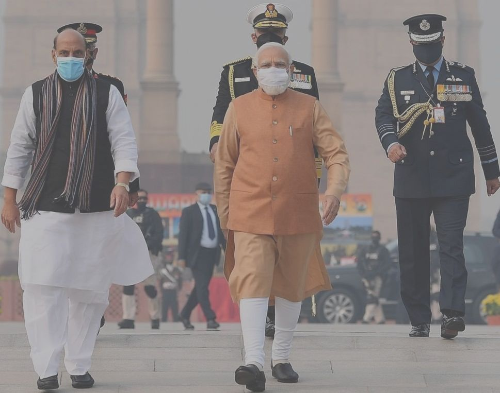

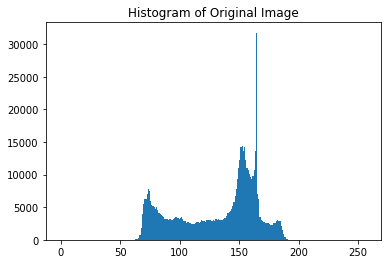


Gray Scale- (393, 500)


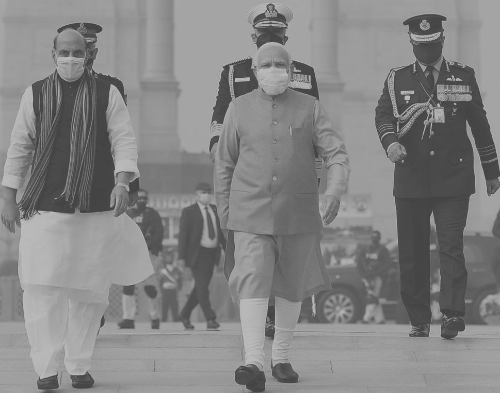


Power-Law Transformations/Gamma Transformations

Original Image									 Gamma Transformed Image. Gamma = 2.2



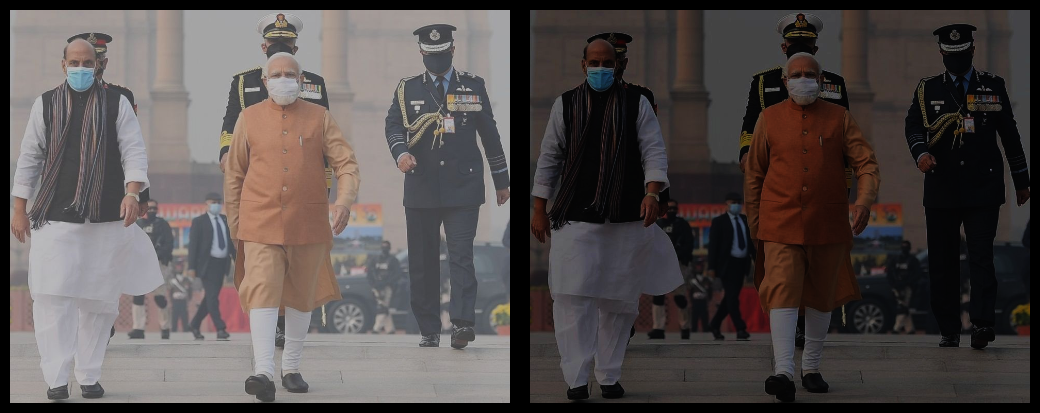

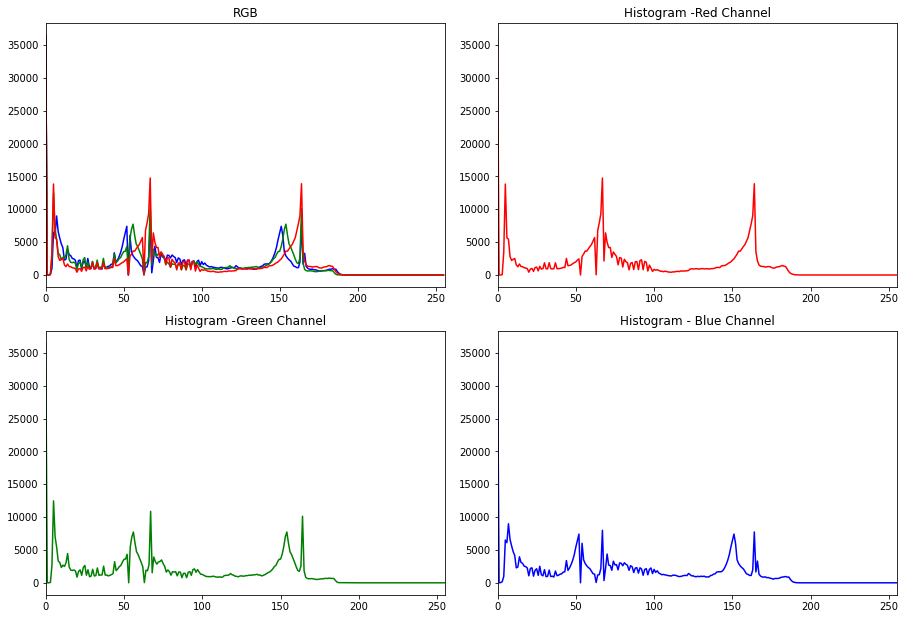

Gray-Scale Image							 Gamma Transformed Gray Image. Gamma = 2.2



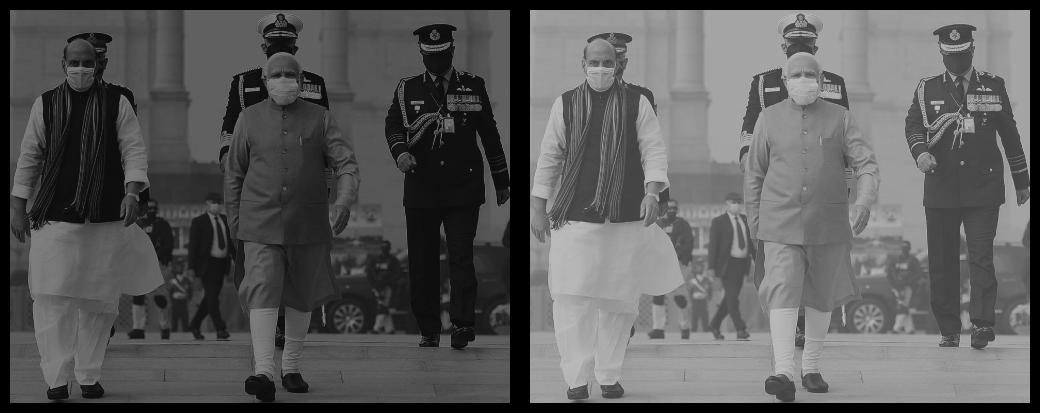

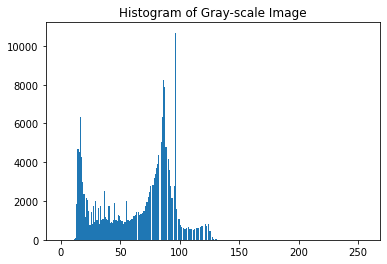


Piece-wise Linear Transformation

Original Image 									 Linear Transformed Image


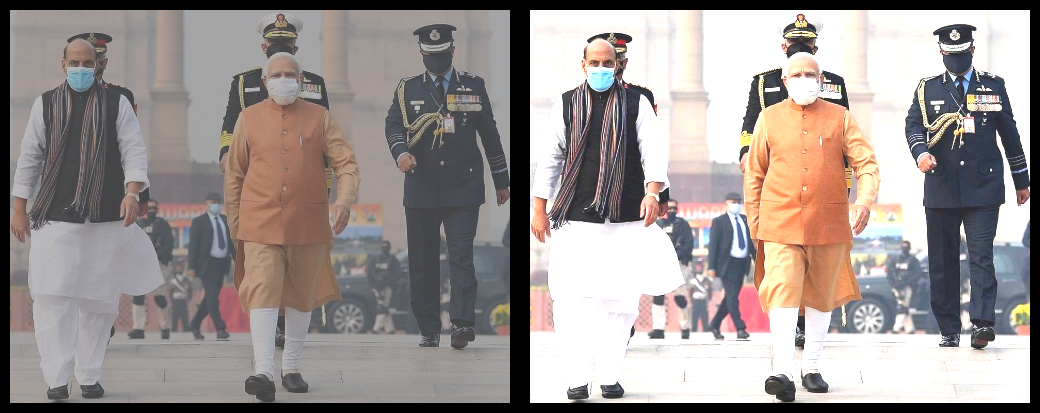

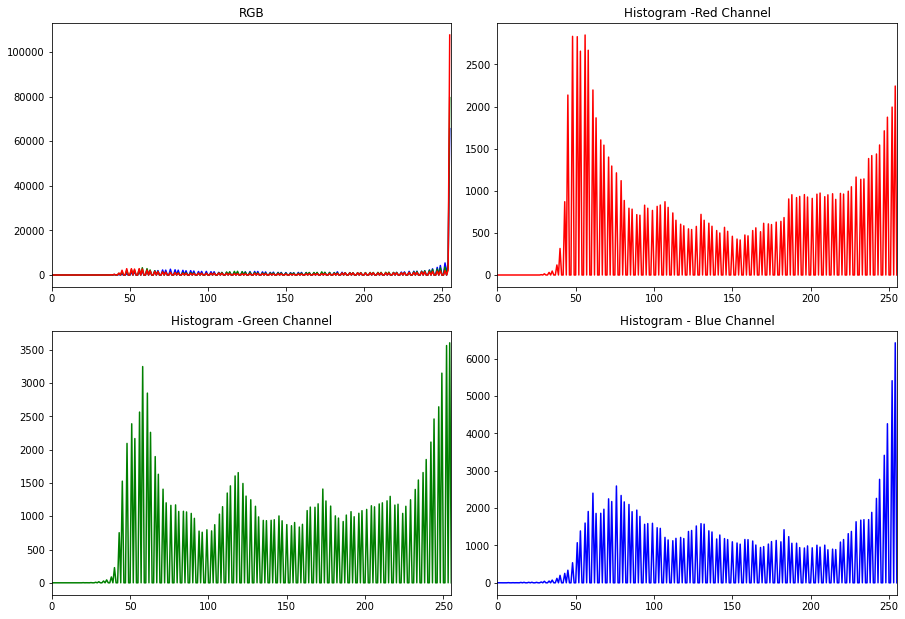

Gray Scale Image 									Gray-Scale Linear Transformed Image


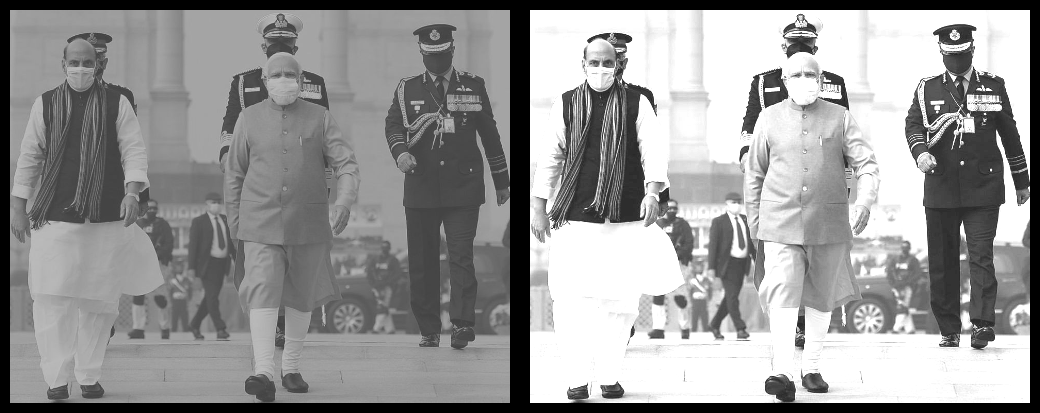

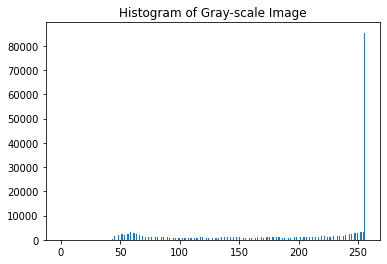


Normalization

Original Image									 Normalized Image


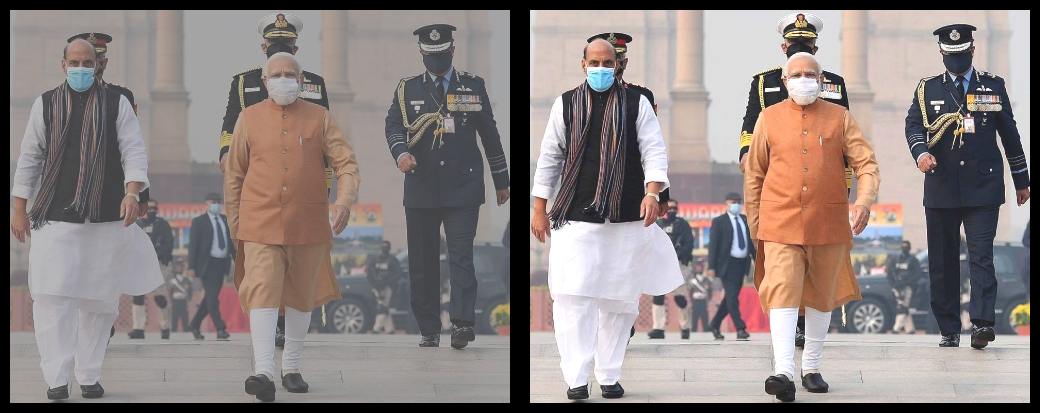

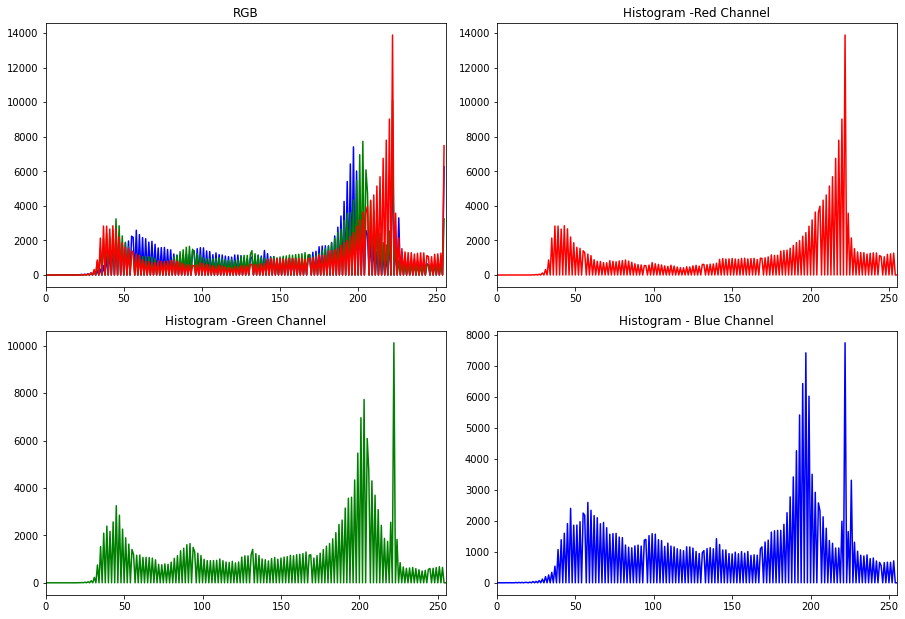

Gray-Scale Image									 Gray-scale Normalized Image


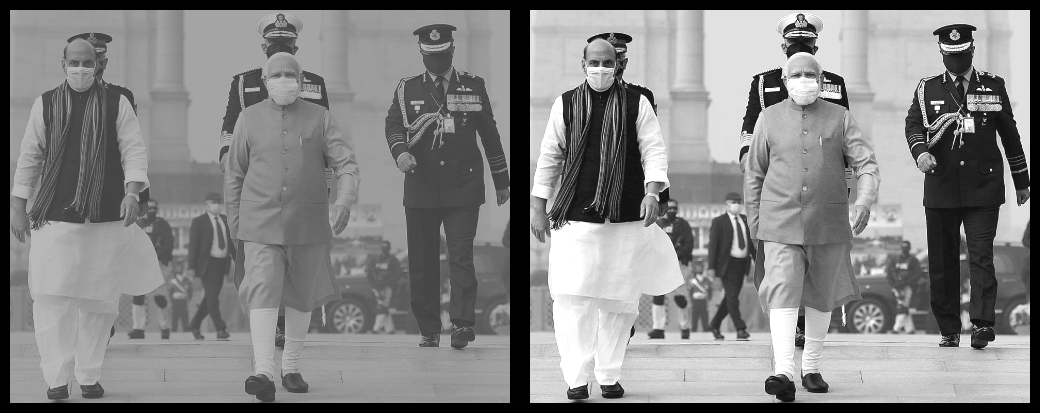

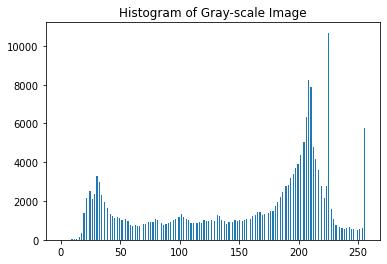

In [ ]:
main()